# Part C *Self-Taught Learning*


 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- ggplot2 - for data visualisation
- h2o- Deeplearning package

## Libraries Used

In [1]:
library(h2o)
options(warn=-1)

# install.packages('h2o')

Warning message:
"package 'h2o' was built under R version 3.6.1"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



##### Task I
Load Task2C_labeled.csv, Task2C_unlabeled.csv and Task2C_test.csv data
sets and required libraries (e.g., H2O). Note that we are going to use
Task2C_labeled.csv and Task2C_unlabeled.csv for training the autoencoder. We
are going to use Task2C_labeled.csv for training the classifier. Finally, we evaluate
the trained classifier on the test Task2C_test.csv.

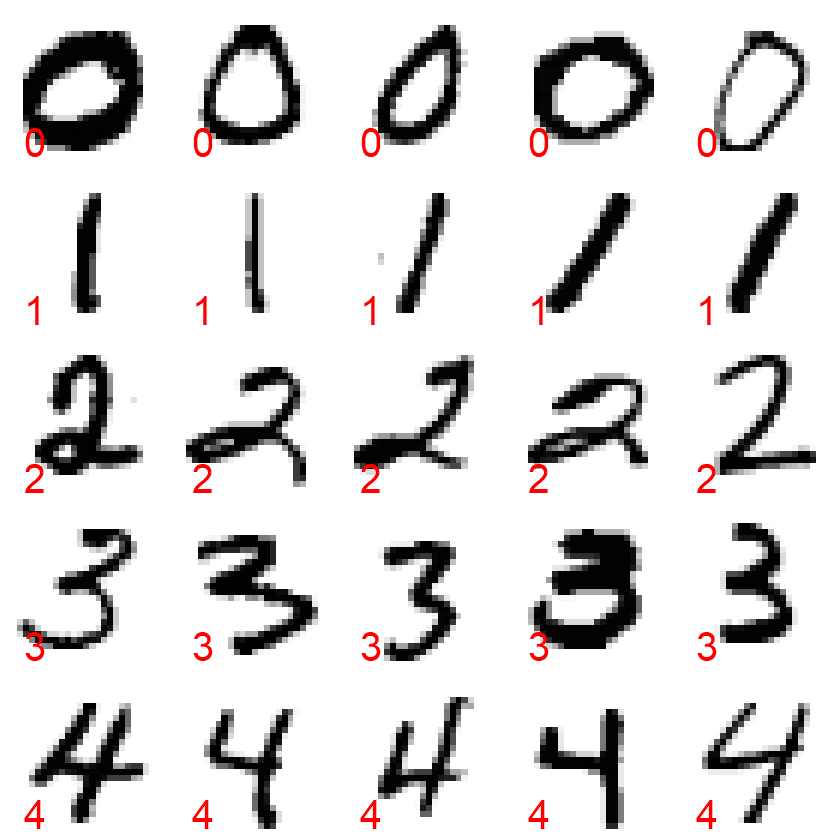

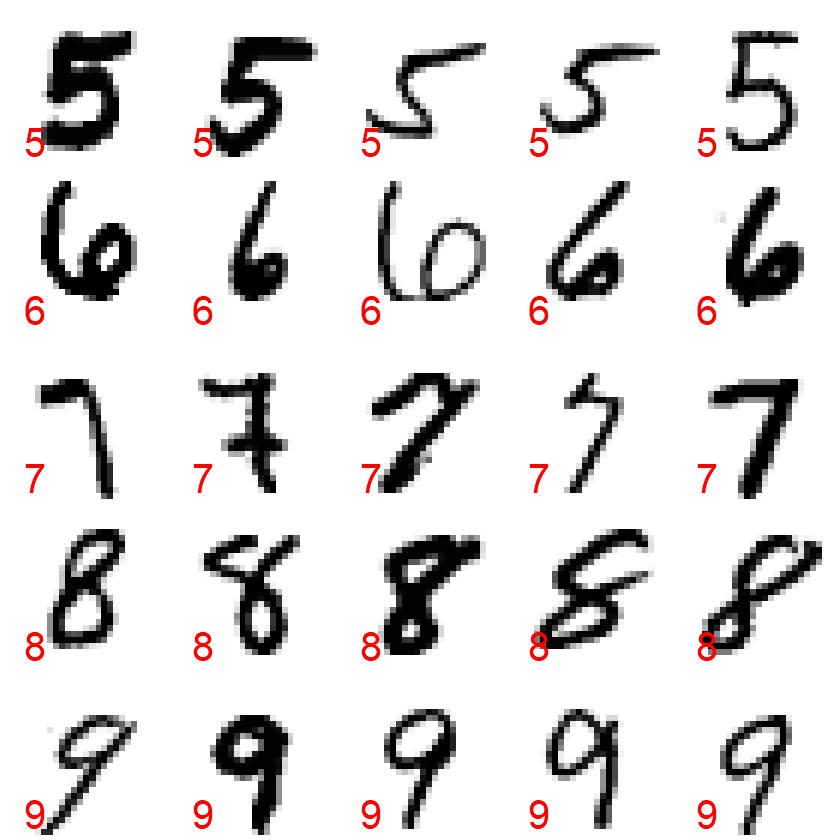

In [2]:
# read data
data = read.csv('./Task2C_labeled.csv')

#visualize some samples
par( mfrow = c(5,5), mai = c(0,0,0,0))
for(i in 1:50){
  y = as.matrix(data[i, 2:785])
  dim(y) = c(28, 28)
  image( y[,nrow(y):1], axes = FALSE, col = gray(255:0 / 255))
  text( 0.2, 0, data[i,1], cex = 3, col = 2, pos = c(3,4))
}
rm(list=ls()) # Clean up unnecessary variables.

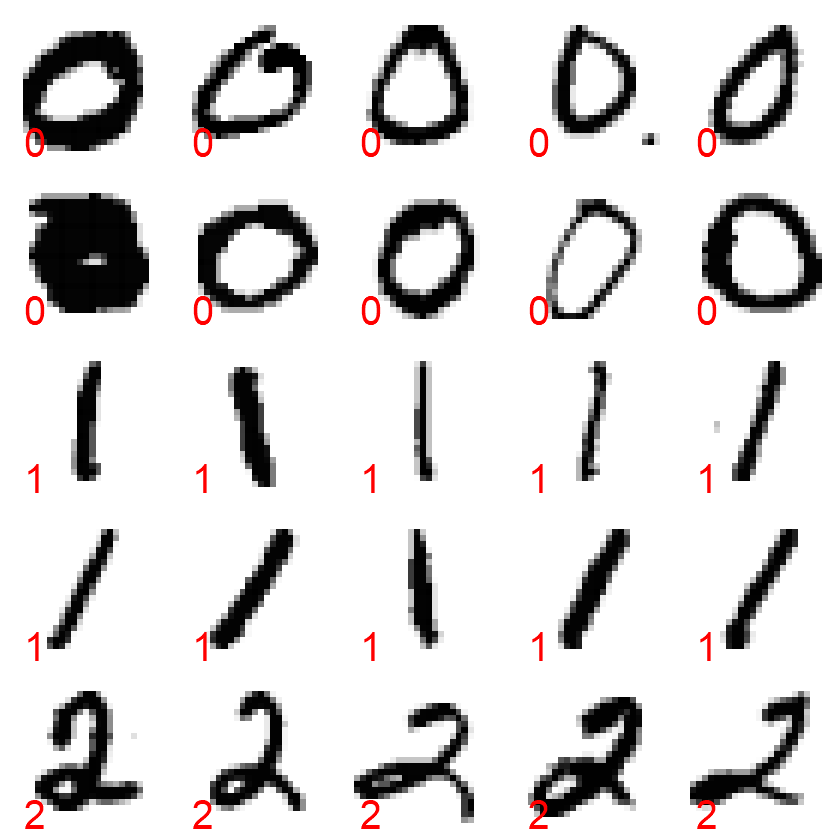

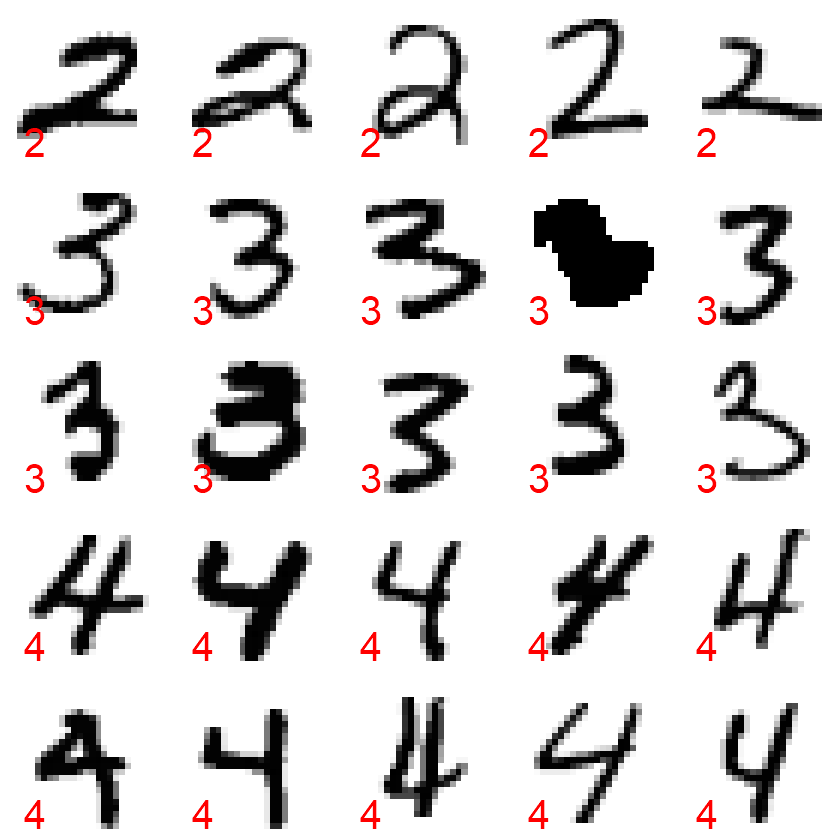

In [3]:
# read data
data = read.csv('./Task2C_unlabeled.csv')

#visualize some samples
par( mfrow = c(5,5), mai = c(0,0,0,0))
for(i in 1:50){
  y = as.matrix(data[i, 2:785])
  dim(y) = c(28, 28)
  image( y[,nrow(y):1], axes = FALSE, col = gray(255:0 / 255))
  text( 0.2, 0, data[i,1], cex = 3, col = 2, pos = c(3,4))
}
rm(list=ls()) # Clean up unnecessary variables.

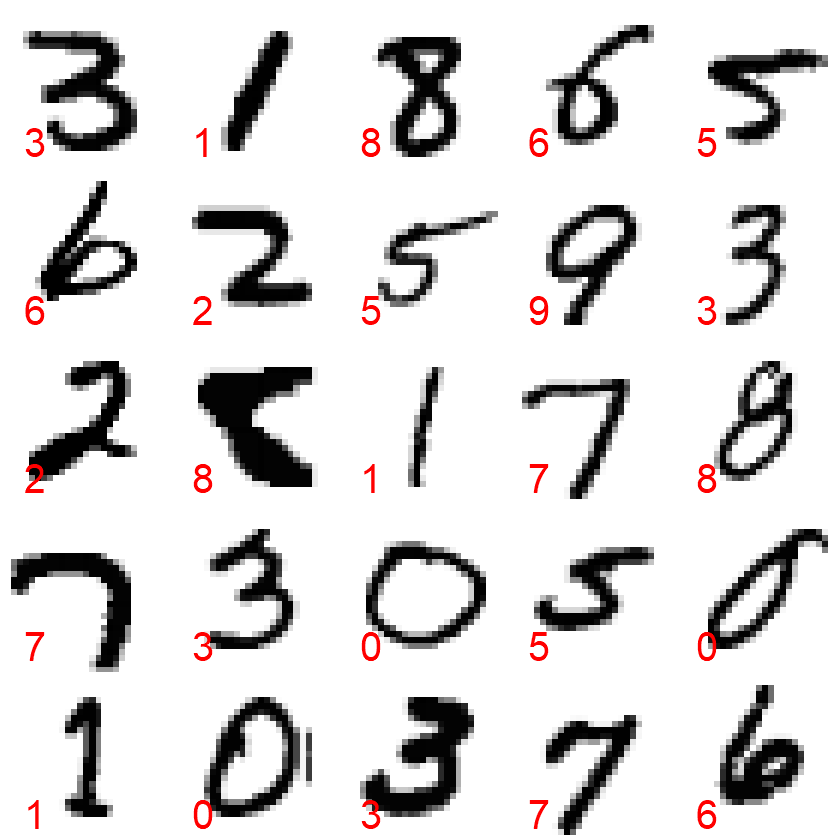

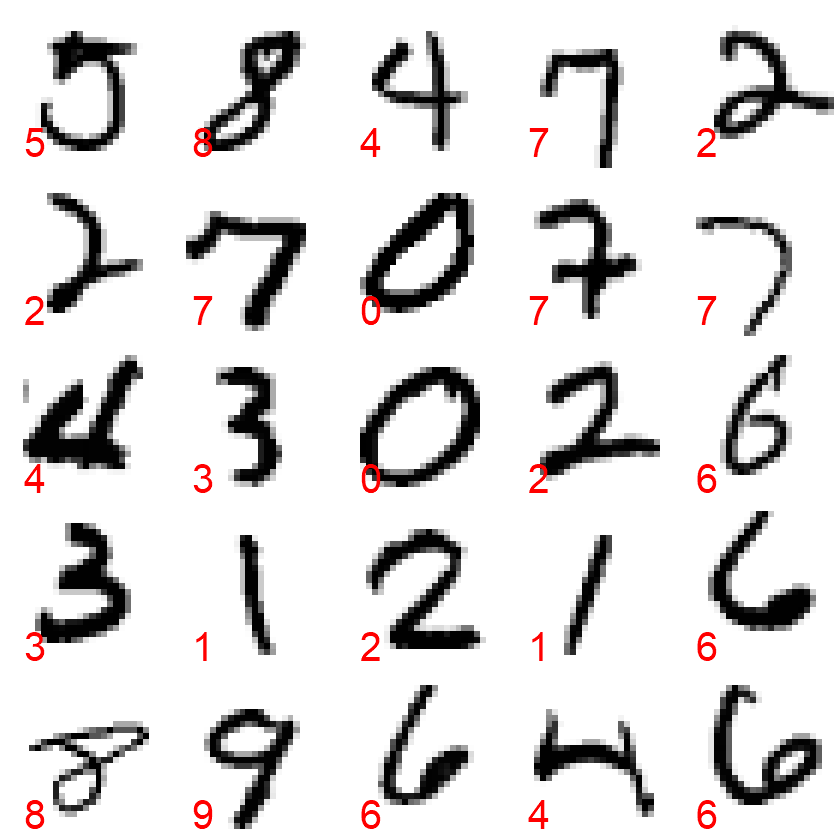

In [4]:
# read data
data = read.csv('./Task2C_Test.csv')

#visualize some samples
par( mfrow = c(5,5), mai = c(0,0,0,0))
for(i in 1:50){
  y = as.matrix(data[i, 2:785])
  dim(y) = c(28, 28)
  image( y[,nrow(y):1], axes = FALSE, col = gray(255:0 / 255))
  text( 0.2, 0, data[i,1], cex = 3, col = 2, pos = c(3,4))
}
rm(list=ls()) # Clean up unnecessary variables.

* Initiating H2O Library

In [5]:
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, startH2O = TRUE)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\HP\AppData\Local\Temp\RtmpiilWuS/h2o_HP_started_from_r.out
    C:\Users\HP\AppData\Local\Temp\RtmpiilWuS/h2o_HP_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 579 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    2 months and 23 days  
    H2O cluster name:           H2O_started_from_R_HP_wyq650 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.97 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O A

* Checking if Na objects exists in the files

In [6]:
any(is.na(read.csv("Task2C_labeled.csv")))
any(is.na(read.csv("Task2C_unlabeled.csv")))
any(is.na(read.csv("Task2C_test.csv")))

[1] FALSE

[1] TRUE

[1] FALSE

* Reading the files

In [7]:
#Reading the files
train.labeled <- read.csv("Task2C_labeled.csv")
train.unlabeled <- read.csv("Task2C_unlabeled.csv")
test <- read.csv("Task2C_test.csv")
#Converting the data to H2o format
labeled.frame <- as.h2o (train.labeled[complete.cases(train.labeled),])
unlabeled.frame <-as.h2o (train.unlabeled[complete.cases(train.unlabeled),])
test.frame <- as.h2o (test[complete.cases(test),])

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [8]:
# labeled.frame[,1] <- as.factor(labeled.frame$label)
train.frame <- h2o.rbind(labeled.frame, unlabeled.frame)
train.frame$label <- as.factor(train.frame$label)
test.frame$label <- as.factor(test.frame$label)

In [ ]:
# labeled.frame[,1] <- as.factor(labeled.frame$label)
# unlabeled.frame[,1] <- NA
# train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
# test.frame[,1] <- as.factor(test.frame$label)

#### Task II 
Train an autoencoder (similar to Activity 5.2) with only one hidden layer and change
the number of its neurons to: 20, 40, 60, 80, .., 500 (i.e. from 20 to 500 with a step
size of 20)


>- Answer in combination with Task III

##### Task III
For each model in Step II, calculate and record the reconstruction error which is
simply the average (over all data points while the model is fixed) of Euclidian
distances between the input and output of the autoencoder (you can simply use
“h2o.anomaly()” function). Plot these values where the x-axis is the number of units
in the middle layer and the y-axis is the reconstruction error. Then, save and attach
the plot to your PDF report. Explain your findings based on the plot in your PDF report.

* Training Autoencoder and recording the error

In [9]:
errors<-matrix(NA,nrow=25,ncol=1)
model.list<- list()

for (k in seq(20, 500, 20)) {
# build a neural network classifier based on the labeled training data
    NN.model <- h2o.deeplearning(    
    x = 2:ncol(train.frame), # select all pixels + extra features
    training_frame = train.frame, # specify the frame (imported file)    
    hidden = c(k), # number of layers and their units
    epochs = 50, # maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = TRUE, # is it an autoencoder? Yes!
    l2 = 0.1
    )
    model.list[[k/20]] <- NN.model
    errors[k/20] <- mean(h2o.anomaly(NN.model,train.frame))
}


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

* Visualization

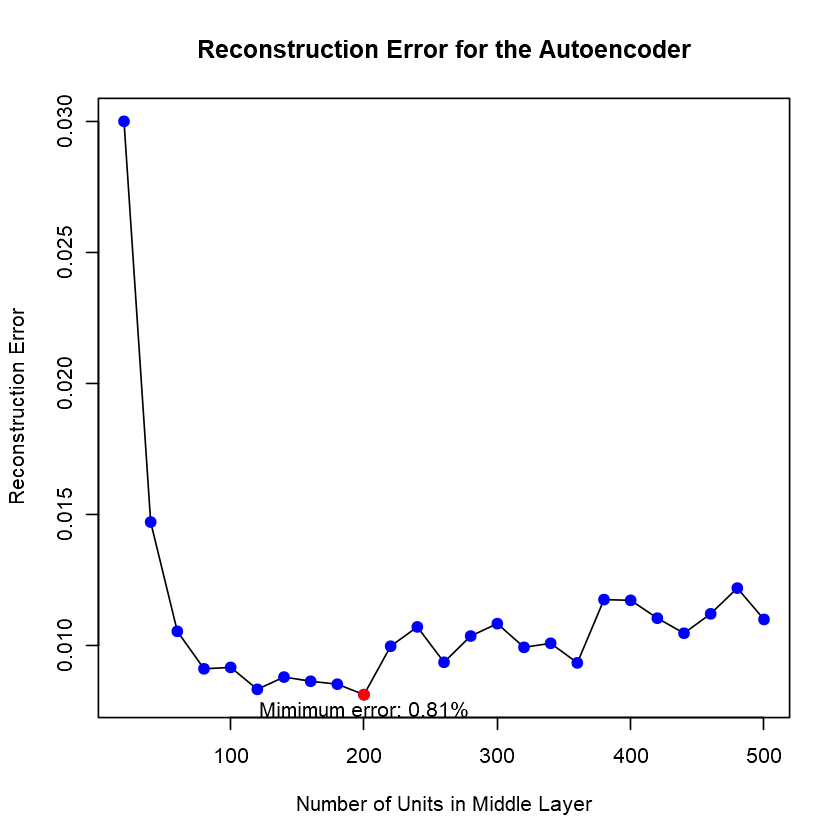

In [10]:
# K with lowest error
min_x =20*which.min(errors)
#Lowest error
min_y=errors[which.min(errors)]
#plot
plot(x=seq(20,500,20),y=errors, type='l', ylab ='Reconstruction Error',xlab ='Number of Units in Middle Layer',main="Reconstruction Error for the Autoencoder")
points (x=seq(20,500,20),y=errors,col ='blue',pch=19)
points(min_x,min_y,col='red',pch=19)
text (min_x,min_y+.0001, labels=paste0("Mimimum error: ",round(min_y*100,2),"%"),pos=1)
#Reference:https://chemicalstatistician.wordpress.com/2013/03/02/adding-labels-to-points-in-a-scatter-plot-in-r/



In [12]:
print(paste0("For K = ", min_x," Neurons, error was minimum at ",round(min_y*100,2), " %"))


[1] "For K = 200 Neurons, error was minimum at 0.81 %"


###### Observation
The graph shows that there is sudden drop of error reaching global minimum at 200 Neurons. After which there is gradual increase in the error with increase of number of neurons which could be possibly due to overfitting.

##### Task IV
Use the 3-layer NN from Activity 5.1 or “h2o.deeplearning” function (make sure you
set “ autoencoder = FALSE”) to build a classification model with 100 units in the
hidden layer using all the original attributes from the training set. Then, calculate and
record the test error.

In [13]:
NN.model.3 <- h2o.deeplearning(    
  x = 2:ncol(train.frame), # select all pixels + extra features
  y = 1,
  training_frame = train.frame, # specify the frame (imported file)    
  hidden = c(100), # number of layers and their units
  epochs = 50, # maximum number of epoches  
  activation = 'Tanh', # activation function 
  autoencoder = FALSE, # is it an autoencoder? Yes!
  l2 = 0.1
)

  |======================================================================| 100%


* General Auxiliary Functions


In [14]:
## The following structure helps us to have functions with multiple outputs
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html

error.rate <- function(Y1, T1){
  if (nrow(Y1)!=nrow(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/nrow(T1))
}

In [15]:
# Predicting from NN3
NN3.predict <- h2o.predict(NN.model.3, test.frame)$predict
#Error rate
NN3.error <- error.rate(test.frame$label, NN3.predict)
print(paste0("Error with three layer: ",NN3.error))

  |======================================================================| 100%
[1] "Error with three layer: 0.491"


##### Task V 
Build augmented self-taught networks using the models learnt in Step II. For each
model:
>A. Add the output of the middle layer as extra features to the original feature set,

>B. Train a 3-layer NN (similar to Step IV) using all features (original + extra).
Then calculate and record the test error.


In [56]:
#Matrix to store extra features and error
SL.errors<-matrix(NA,nrow=25,ncol=3)

for (k in seq(20, 500, 20)) {
# build a neural network classifier based on the labeled training data
   
    #stored all the models from Task II in model.list therefore will use the list to fetch the models
    middle.layer<-as.h2o(h2o.deepfeatures(model.list[[k/20]], train.frame, layer=1))
    new.train<-h2o.cbind(train.frame,middle.layer)
    #Exxtra Features
    SL.errors[k/20,1] <- ncol(middle.layer)
    SL.errors[k/20,3] <- ncol(new.train)

    SL.model <- h2o.deeplearning(    
    x = 2:ncol(new.train), # select all pixels + extra features
    y=1,
    training_frame = new.train, # specify the frame (imported file)    
    hidden = c(100), # number of layers and their units
    epochs = 50, # maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = FALSE, # is it an autoencoder? Yes!
    )
    # Predicting from NN3
    SL.predict <- h2o.predict(SL.model, test.frame)$predict
    #Error rate
    SL.errors[k/20,2] <- error.rate(test.frame$label, SL.predict)

}


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

In [34]:
#Classification Error recorded for number of extra features
SL.errors.df<- data.frame(extra_features= SL.errors[,1], error=SL.errors[,2])
SL.errors.df

extra_features,error
20,0.347
40,0.335
60,0.370
80,0.477
100,0.355
120,0.364
140,0.431
160,0.363
180,0.403
200,0.398


##### Task VI
Plot the error rates for the 3-layer neural networks from Step V while the x-axis is
the number of extra features and y-axis is the classification error. Save and attach
the plot to your PDF report

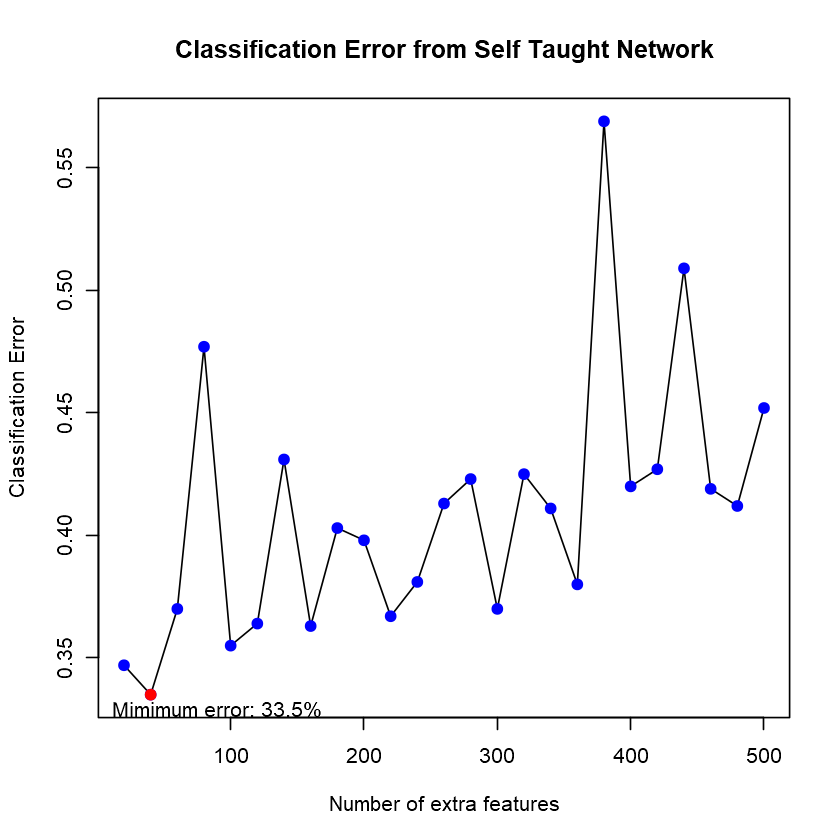

In [51]:
# Number of extra fetures with lowest error
SL.min_x =SL.errors.df[which.min(SL.errors.df$error),1]
#Lowest error
SL.min_y=min(SL.errors.df$error)
#plot
plot(x=SL.errors.df[,1],y=SL.errors.df[,2], type='l', ylab ='Classification Error',xlab ='Number of extra features',main="Classification Error from Self Taught Network")
points (x=SL.errors.df[,1],y=SL.errors.df[,2],col ='blue',pch=19)
points(SL.min_x,SL.min_y,col='red',pch=19)
text (SL.min_x+50,SL.min_y+0.001, labels=paste0("Mimimum error: ",round(SL.min_y*100,2),"%"),pos=1)
#Reference:https://chemicalstatistician.wordpress.com/2013/03/02/adding-labels-to-points-in-a-scatter-plot-in-r/



##### Task VII
Report the optimum number(s) of units in the middle layer of the autoencoder in
terms of the reconstruction and misclassification errors

In [53]:
print(paste0("For K = ", min_x," Neurons, Reconstruction error was minimum at ",round(min_y*100,2), " %"))
print(paste0("For ", SL.min_x," extra features in the middle layer,Classification error was minimum at ",round(SL.min_y*100,2), " %"))


[1] "For K = 200 Neurons, Reconstruction error was minimum at 0.81 %"
[1] "For 40 extra features in the middle layer,Classification error was minimum at 33.5 %"


It is evident from the previous graphs (in task III and Task VI) and above cell it is clear that optimum number of units for **reconstruction error is 200** where it generates the **lowest error of 0.81 %** where as for Classification error optimum number of units in the middle layer should be **825 (total number of units or 40 extra features)** where **minimum error observed was 33.5 %**

##### Task VIII
Comparing the plot from Step III and VI, do you observe any relation between the
reconstruction error and misclassification error? Explain your finding and add them to your PDF report

- It is evident from both the geaphs that classification error (Task VI) which was initially less but started increasing with minor fluctuations and it is safe to say it is highly unstable learning process where as Reconstruciton error (Task III) was initially very high but reduced to the global minimum and fluctuated very little when compared with the fluctuations of classification error